# Initial Implementation

## Library Imports

Here, the necessary libraries are imported

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

## Filename

This declares the filename variable for the sample wavefile. It is a recording of an Bass E string strum, from [this recording](https://freesound.org/people/Kyster/sounds/117677/) on freesound.org.

In [146]:
FILE = "E_string_sample.wav"

## Reading the file

Here the file is read using the scipy.io.wavefile.read() function, which pulls the sample rate and the raw data. 

In [147]:
def read_wav(filename):
    return wavfile.read(filename)

## Plotting wavefile

This function plots the data that was read from the wavefile.

In [148]:
def plot_wav(sample_rate, data):
    length = data.shape[0] / sample_rate
    
    # prints the information from the file
    print(f"Recording length: {length:.3f}s")
    print(f"Sample Rate: {sample_rate}Hz")
    
    # creates a time array for plotting
    time = np.linspace(0., length, data.shape[0])
    
    # uses matplot.lib for plotting functions, plotting both audio channels
    plt.plot(time, data[:, 0], label="Left channel")
    plt.plot(time, data[:, 1], label="Right channel")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

## Perform FFT

This uses the numpy real FFT function to do a real-FFT on the data inputted to the function.

In [149]:
def do_fft(signal, sample_rate):
    fft_spectrum = np.fft.rfft(signal)
    freq = np.fft.rfftfreq(signal.size, d=1./sample_rate)  # get frequency values of FFT
    fft_spectrum_abs = np.abs(fft_spectrum)  # compute absolute value of FFT plot
    return freq, fft_spectrum_abs

## Plot FFT

This function takes in the frequency and FFT datasets and plots them using the matplot.lib functions.

In [150]:
def plot_fft(freq_array, fft_array):
    plt.plot(freq_array, fft_array)
    plt.xlabel("frequency, Hz")
    plt.ylabel("Amplitude, units")
    plt.show()

## Get Max frequency

This function returns the frequency (in Hz) of the maximum amplitude from the FFT dataset and looking it up in the frequency dataset.

In [151]:
def get_freq(freq_array, fft_array):
    i = np.where(fft_array == max(fft_array))
    return float(freq_array[i[0]])

## Get Closest Note

This function returns the string of the closest note depending on the pitch frequency given.

In [161]:
def get_note(pitch_freq):
    CONCERT_PITCH = 440 # tuning standard in music
    ALL_NOTES = ["A","A#","B","C","C#","D","D#","E","F","F#","G","G#"] # musical notes arranged properly
    i = int(np.round(np.log2(pitch_freq/CONCERT_PITCH)*12))
    return ALL_NOTES[i % 12] + str(4 + (i + 9) // 12)

## Run for timeit

This function runs all the function without the plots in order for software implementation timing.

In [164]:
def run_timed():
    sample_rate, data = read_wav(FILE)
    freq, fft = do_fft(data[:sample_rate,0], sample_rate) # only use one channel, 1 second of data
    wav_freq = get_freq(freq, fft)
    note = get_note(wav_freq)

In [165]:
%timeit run_timed()

10 loops, best of 3: 85.8 ms per loop


## Run

This function runs the all the functions with the plots for visualization of the data.

In [162]:
def run():
    sample_rate, data = read_wav(FILE)
    plot_wav(sample_rate, data)
    freq, fft = do_fft(data[:sample_rate,0], sample_rate) # only use one channel, 1 second of data
    plot_fft(freq[:10000], fft[:10000])
    wav_freq = get_freq(freq[:10000], fft[:10000])
    print(f"Recording Frequency: {wav_freq:.3f}Hz")
    note = get_note(wav_freq)
    print("Recording Note: " + note)

Recording length: 9.102s
Sample Rate: 48000Hz


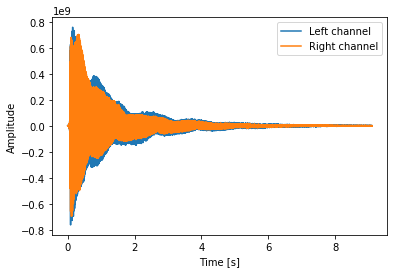

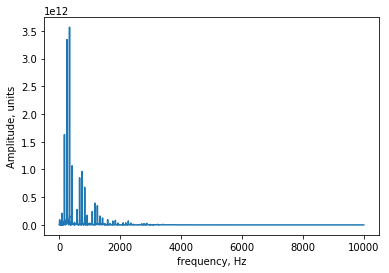

Recording Frequency: 332.000Hz
Recording Note: E4


In [163]:
run()

## Expected Result

According to this [link](https://en.wikipedia.org/wiki/Guitar_tunings), the Bass E4 string (what the recording contains) should be 329.63Hz. The code should produce a number rather similar to the expected value (might be a little off, ~332Hz). The get_node function should then return as the closest node according to the given frequency of ~332Hz, which is the E4 note.